In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

# Import Data

## Data Harian

In [2]:
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         

In [3]:
terms = ["pemilihan umum","inflasi","Undang-Undang Cipta Kerja","Reshuffle menteri", "nilai tukar rupiah terhadap dolar",
       "perubahan suku bunga bank","harga BBM","pandemi Covid 19","kebijakan lockdown","pemindahan Ibu Kota Negara"]
PATH = "Data\\data_harian"
file_PATH = get_all_file_paths(PATH)

In [4]:
csv_data = {}

for file_path in file_PATH:
    # Mendapatkan nama variabel dari nama file tanpa ekstensi
    var_name = file_path.split('\\')[-1].replace('.csv', '').replace(' ', '_').lower()
    
    # Membuka dan membaca file CSV
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        # Menyimpan data ke dalam dictionary
        csv_data[var_name] = [row for row in csv_reader]

In [5]:
list_keys = list(csv_data.keys())
daily_df = None
for keys in list_keys:
    df = pd.DataFrame(csv_data[keys][1:],columns=[keys,"date"]).sort_values(by="date")
    df = df[["date",keys]]
    df[keys] = df[keys].astype(float)
    if daily_df is None:
        daily_df = df
    else:
        daily_df = pd.merge(daily_df, df, on='date')

In [6]:
daily_df["date"] = pd.to_datetime(daily_df["date"])

In [7]:
nama_kolom = [
    "Fuel Prices",
    "Inflation",
    "Lockdown Policy",
    "Rupiah Exchange Rate",
    "COVID-19 Pandemic",
    "General Election",
    "Relocation of the Capital City",
    "Minister Reshuffle",
    "Bank Interest Rate", 
    "Job Creation Law"
]

In [8]:
daily_df.head()

,date,harga_bbm,inflasi,kebijakan_lockdown,nilai_tukar_rupiah_terhadap_dolar,pandemi_covid_19,pemilihan_umum,pemindahan_ibu_kota_negara,reshuffle_menteri,suku_bunga_bank,undang-undang_cipta_kerja
0,2019-01-01,9.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-02,8.0,57.0,0.0,0.0,0.0,51.0,0.0,0.0,27.0,0.0
2,2019-01-03,8.0,51.0,0.0,0.0,0.0,46.0,0.0,0.0,24.0,0.0
3,2019-01-04,24.0,51.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,2019-01-05,100.0,37.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0


In [9]:
# daily_df.to_csv("tren.csv",index=False)

## Data Bulanan

In [10]:
PATH = "Data\\Bulan"
file_PATH = get_all_file_paths(PATH)

In [11]:
file_PATH

['Data\\Bulan\\harga BBM.csv',
 'Data\\Bulan\\inflasi.csv',
 'Data\\Bulan\\kebijakan lockdown.csv',
 'Data\\Bulan\\nilai tukar rupiah terhadap dolar.csv',
 'Data\\Bulan\\pandemi Covid 19.csv',
 'Data\\Bulan\\pemilihan umum.csv',
 'Data\\Bulan\\pemindahan Ibu Kota Negara.csv',
 'Data\\Bulan\\Reshuffle menteri.csv',
 'Data\\Bulan\\suku bunga bank.csv',
 'Data\\Bulan\\Undang-Undang Cipta Kerja.csv']

In [12]:
csv_data = {}

for file_path in file_PATH:
    # Mendapatkan nama variabel dari nama file tanpa ekstensi
    var_name = file_path.split('\\')[-1].replace('.csv', '').replace(' ', '_').lower()
    
    # Membuka dan membaca file CSV
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        # Menyimpan data ke dalam dictionary
        csv_data[var_name] = [row for row in csv_reader]

In [13]:
list_keys = list(csv_data.keys())
monthly_df = None
for keys in list_keys:
    df = pd.DataFrame(csv_data[keys][1:],columns=[keys,"date"]).sort_values(by="date")
    df = df[["date",keys]]
    df[keys] = df[keys].astype(float)
    if monthly_df is None:
        monthly_df = df
    else:
        monthly_df = pd.merge(monthly_df, df, on='date')

In [14]:
monthly_df["date"] = pd.to_datetime(monthly_df["date"])

In [15]:
monthly_df.head()

,date,harga_bbm,inflasi,kebijakan_lockdown,nilai_tukar_rupiah_terhadap_dolar,pandemi_covid_19,pemilihan_umum,pemindahan_ibu_kota_negara,reshuffle_menteri,suku_bunga_bank,undang-undang_cipta_kerja
0,2019-01-01,10.0,35.0,0.0,45.0,0.0,5.0,0.0,0.0,41.0,0.0
1,2019-02-01,11.0,31.0,0.0,28.0,0.0,8.0,0.0,0.0,63.0,0.0
2,2019-03-01,5.0,37.0,0.0,25.0,0.0,11.0,0.0,0.0,48.0,0.0
3,2019-04-01,4.0,36.0,0.0,27.0,0.0,89.0,17.0,0.0,39.0,0.0
4,2019-05-01,4.0,35.0,0.0,36.0,0.0,15.0,65.0,2.0,27.0,0.0


In [16]:
# monthly_df.to_csv("bulan.csv",index=False)

## LQ45

In [17]:
LQ45 = pd.read_csv("Data/LQ45.csv",delimiter=",")

In [18]:
LQ45["Date"] = pd.to_datetime(LQ45["Date"])

In [19]:
LQ45

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,983.580017,986.570007,980.210022,984.349976,984.349976,1.136800e+09
1,2019-01-03,983.090027,990.880005,981.159973,990.880005,990.880005,1.294000e+09
2,2019-01-04,988.400024,1001.640015,985.940002,1001.640015,1001.640015,1.978200e+09
3,2019-01-07,1012.400024,1017.830017,1002.780029,1002.780029,1002.780029,2.613300e+09
4,2019-01-08,1004.039978,1008.440002,994.010010,997.419983,997.419983,1.774800e+09
...,...,...,...,...,...,...,...
1300,2024-04-24,931.159973,936.679993,924.880005,931.359985,931.359985,5.021600e+09
1301,2024-04-25,929.789978,931.809998,920.619995,923.489990,923.489990,3.721400e+09
1302,2024-04-26,919.450012,921.890015,898.780029,898.780029,898.780029,4.495700e+09
1303,2024-04-29,895.229980,917.380005,894.650024,915.349976,915.349976,4.753100e+09


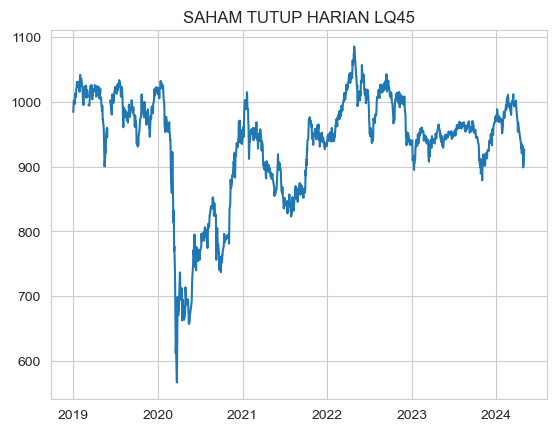

In [20]:
sns.set_style('whitegrid')

plt.plot(LQ45["Date"],LQ45["Close"])
plt.title("SAHAM TUTUP HARIAN LQ45")
plt.show()

# PreProcessing Data

## Adjusting data

### Data harian sebelum di adjust

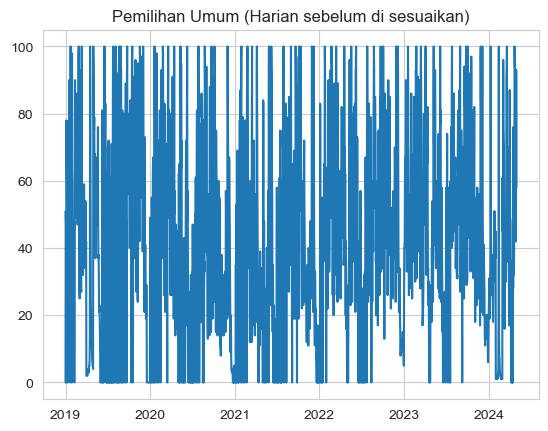

In [21]:
sns.set_style('whitegrid')

plt.plot(daily_df["date"],daily_df["pemilihan_umum"])
plt.title("Pemilihan Umum (Harian sebelum di sesuaikan)")
plt.show()

## Bulanan

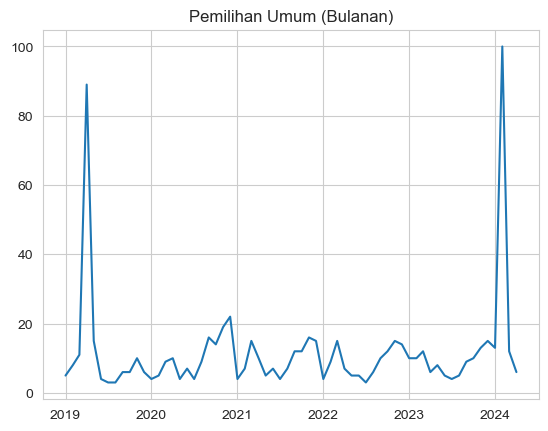

In [22]:
sns.set_style('whitegrid')

plt.plot(monthly_df["date"],monthly_df["pemilihan_umum"])
plt.title("Pemilihan Umum (Bulanan)")
plt.show()

### Adjust Data

In [23]:
for index, row in monthly_df.iterrows():
    month = row['date'].month
    year = row['date'].year
    monthly_value = row.drop('date')
    filter_data = daily_df[((daily_df["date"].dt.month == month )& (daily_df["date"].dt.year == year))].drop("date",axis=1)
    if index == 0:
        adjust_daily_data = filter_data.multiply(monthly_value/100.0)
    else:
        temp_data =  filter_data.multiply(monthly_value/100.0)
        adjust_daily_data = pd.concat([adjust_daily_data,temp_data])
adjust_daily_data["date"] = daily_df["date"]
adjust_daily_data = adjust_daily_data.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]

#### Data harian setelah adjust

In [24]:
adjust_daily_data["inflasi"].describe()

count     1947.0
unique    1001.0
top         14.0
freq        10.0
Name: inflasi, dtype: float64

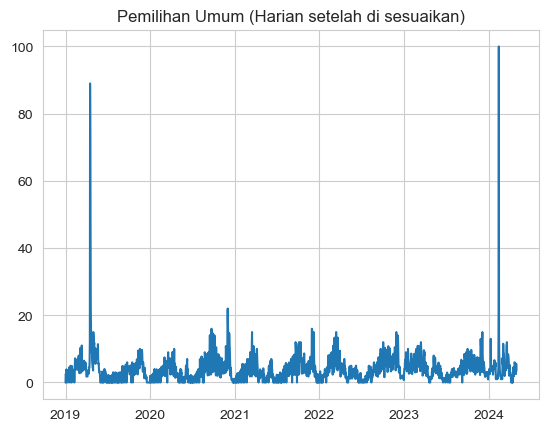

In [25]:
sns.set_style('whitegrid')

plt.plot(adjust_daily_data["date"],adjust_daily_data["pemilihan_umum"])
plt.title("Pemilihan Umum (Harian setelah di sesuaikan)")
plt.show()

## Plot Keseluruhan

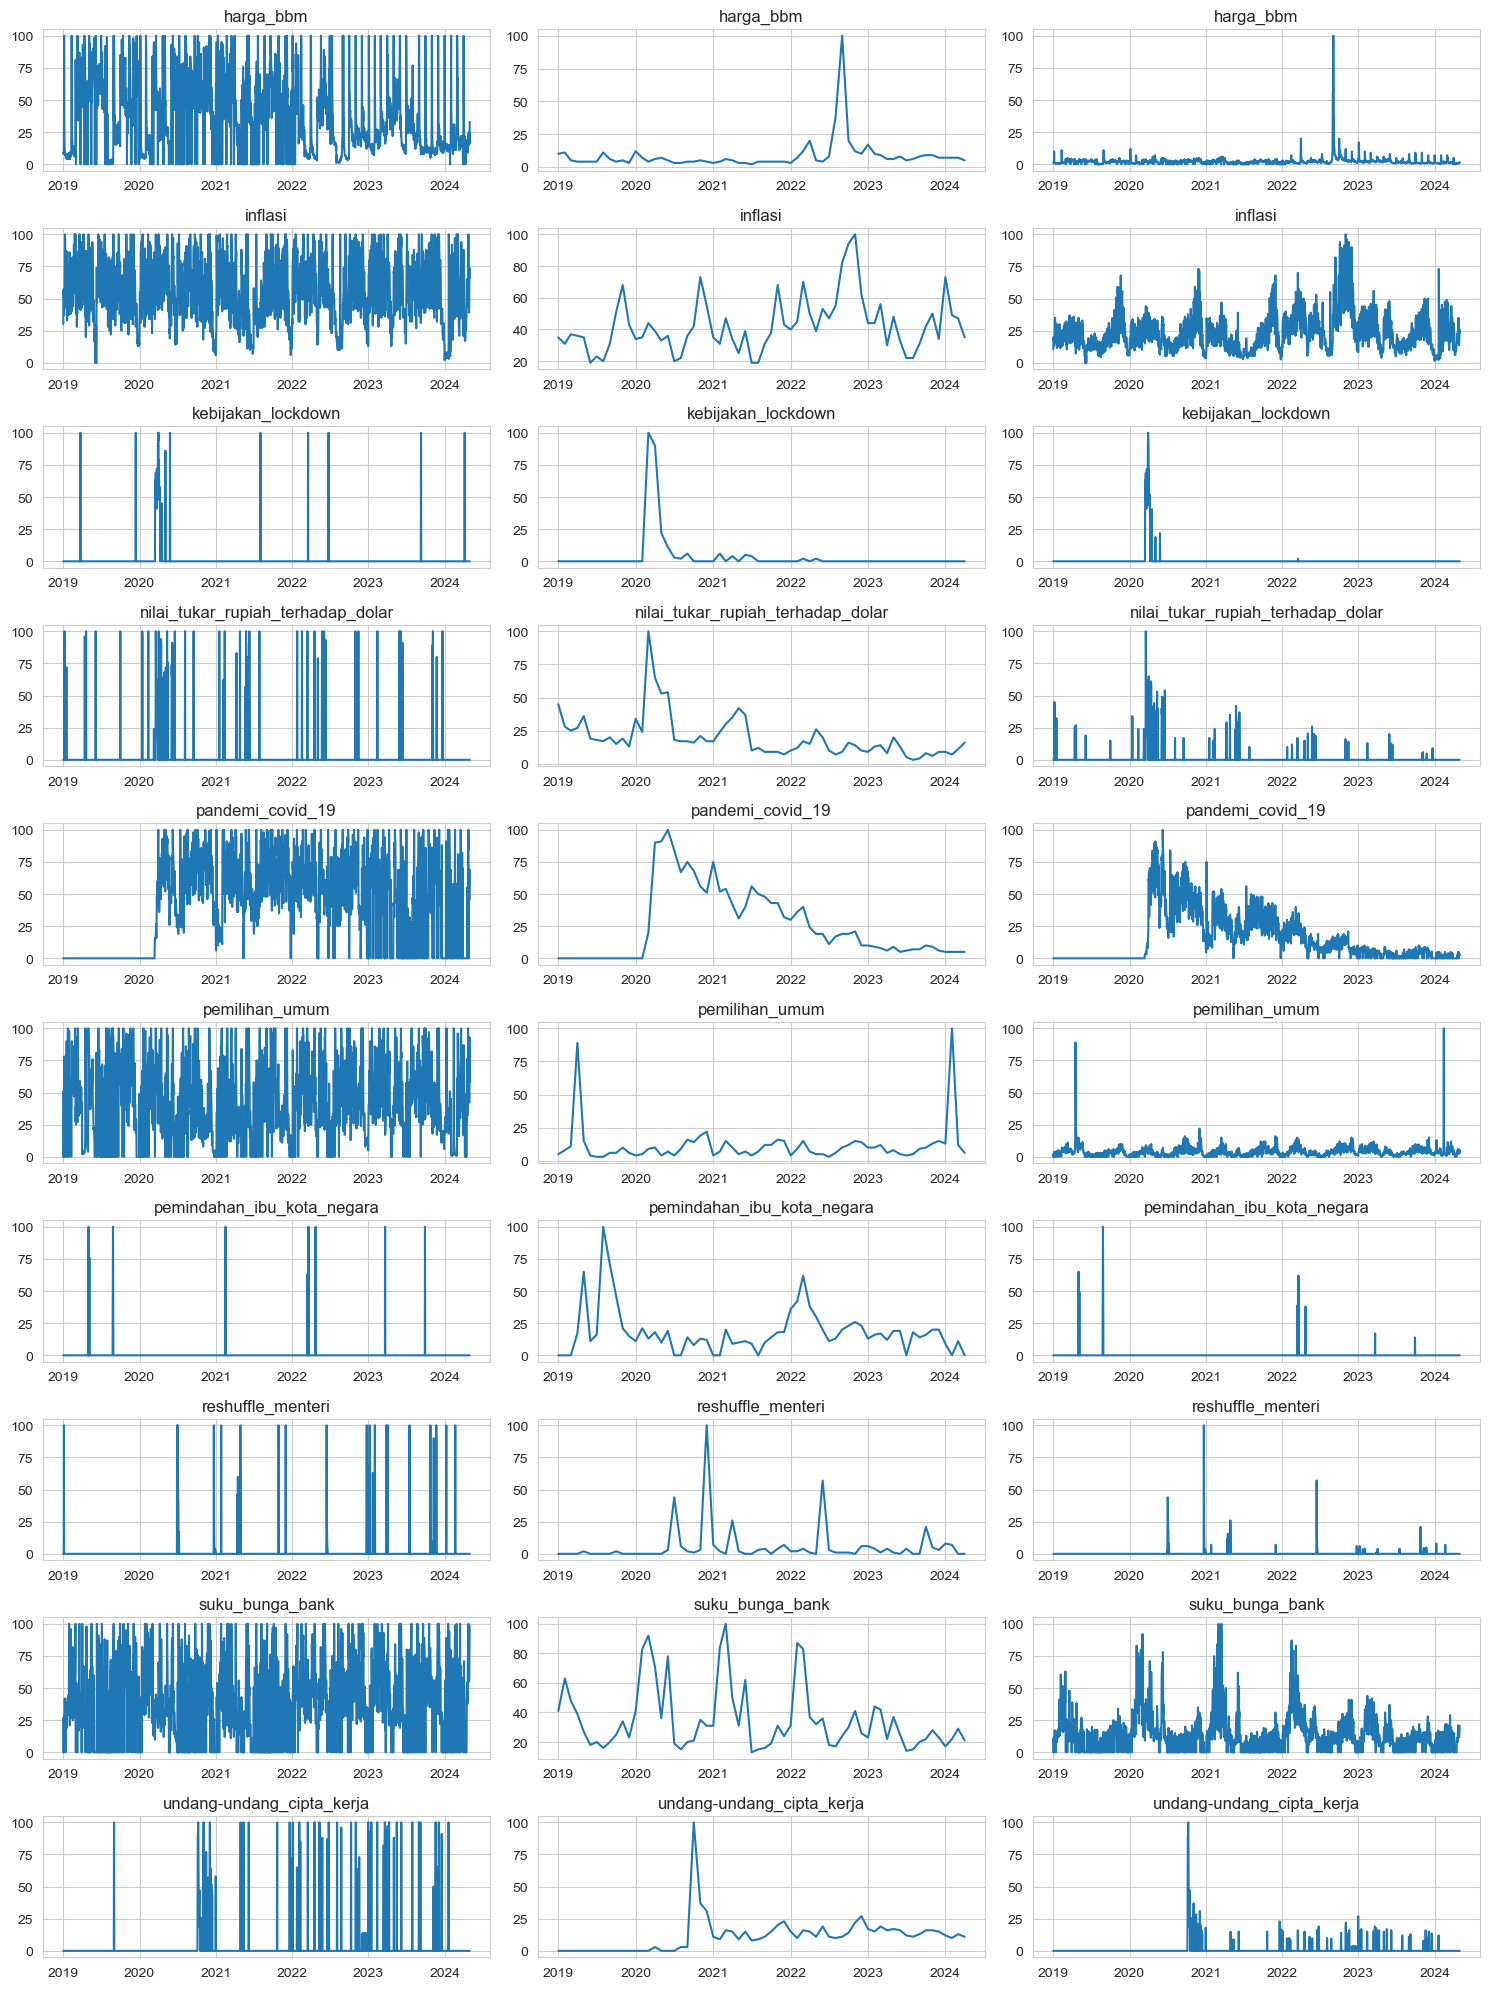

In [26]:
sns.set_style('whitegrid')
# palettes = sns.color_palette("deep")
kolom = daily_df.iloc[:,1:].columns

list_tanggal_bulan = [daily_df["date"],monthly_df["date"]]
list_data = [daily_df,monthly_df,adjust_daily_data]
fig, axes = plt.subplots(10, 3, figsize=(15, 20))
for i in range(10):
    for j in range(3):
        # Warna
#         warna = palettes[j]
        
        # Memilih kolom ke-i pada dataframe ke-j
        col = list_data[j].iloc[:, i+1]
        
        # Plot kolom ke-i dari dataframe ke-j
        axes[i, j].plot(list_tanggal_bulan[j%2] ,col)
        axes[i, j].set_title(kolom[i])
fig.tight_layout()
plt.savefig("adjust_plot_1.png")
plt.show()


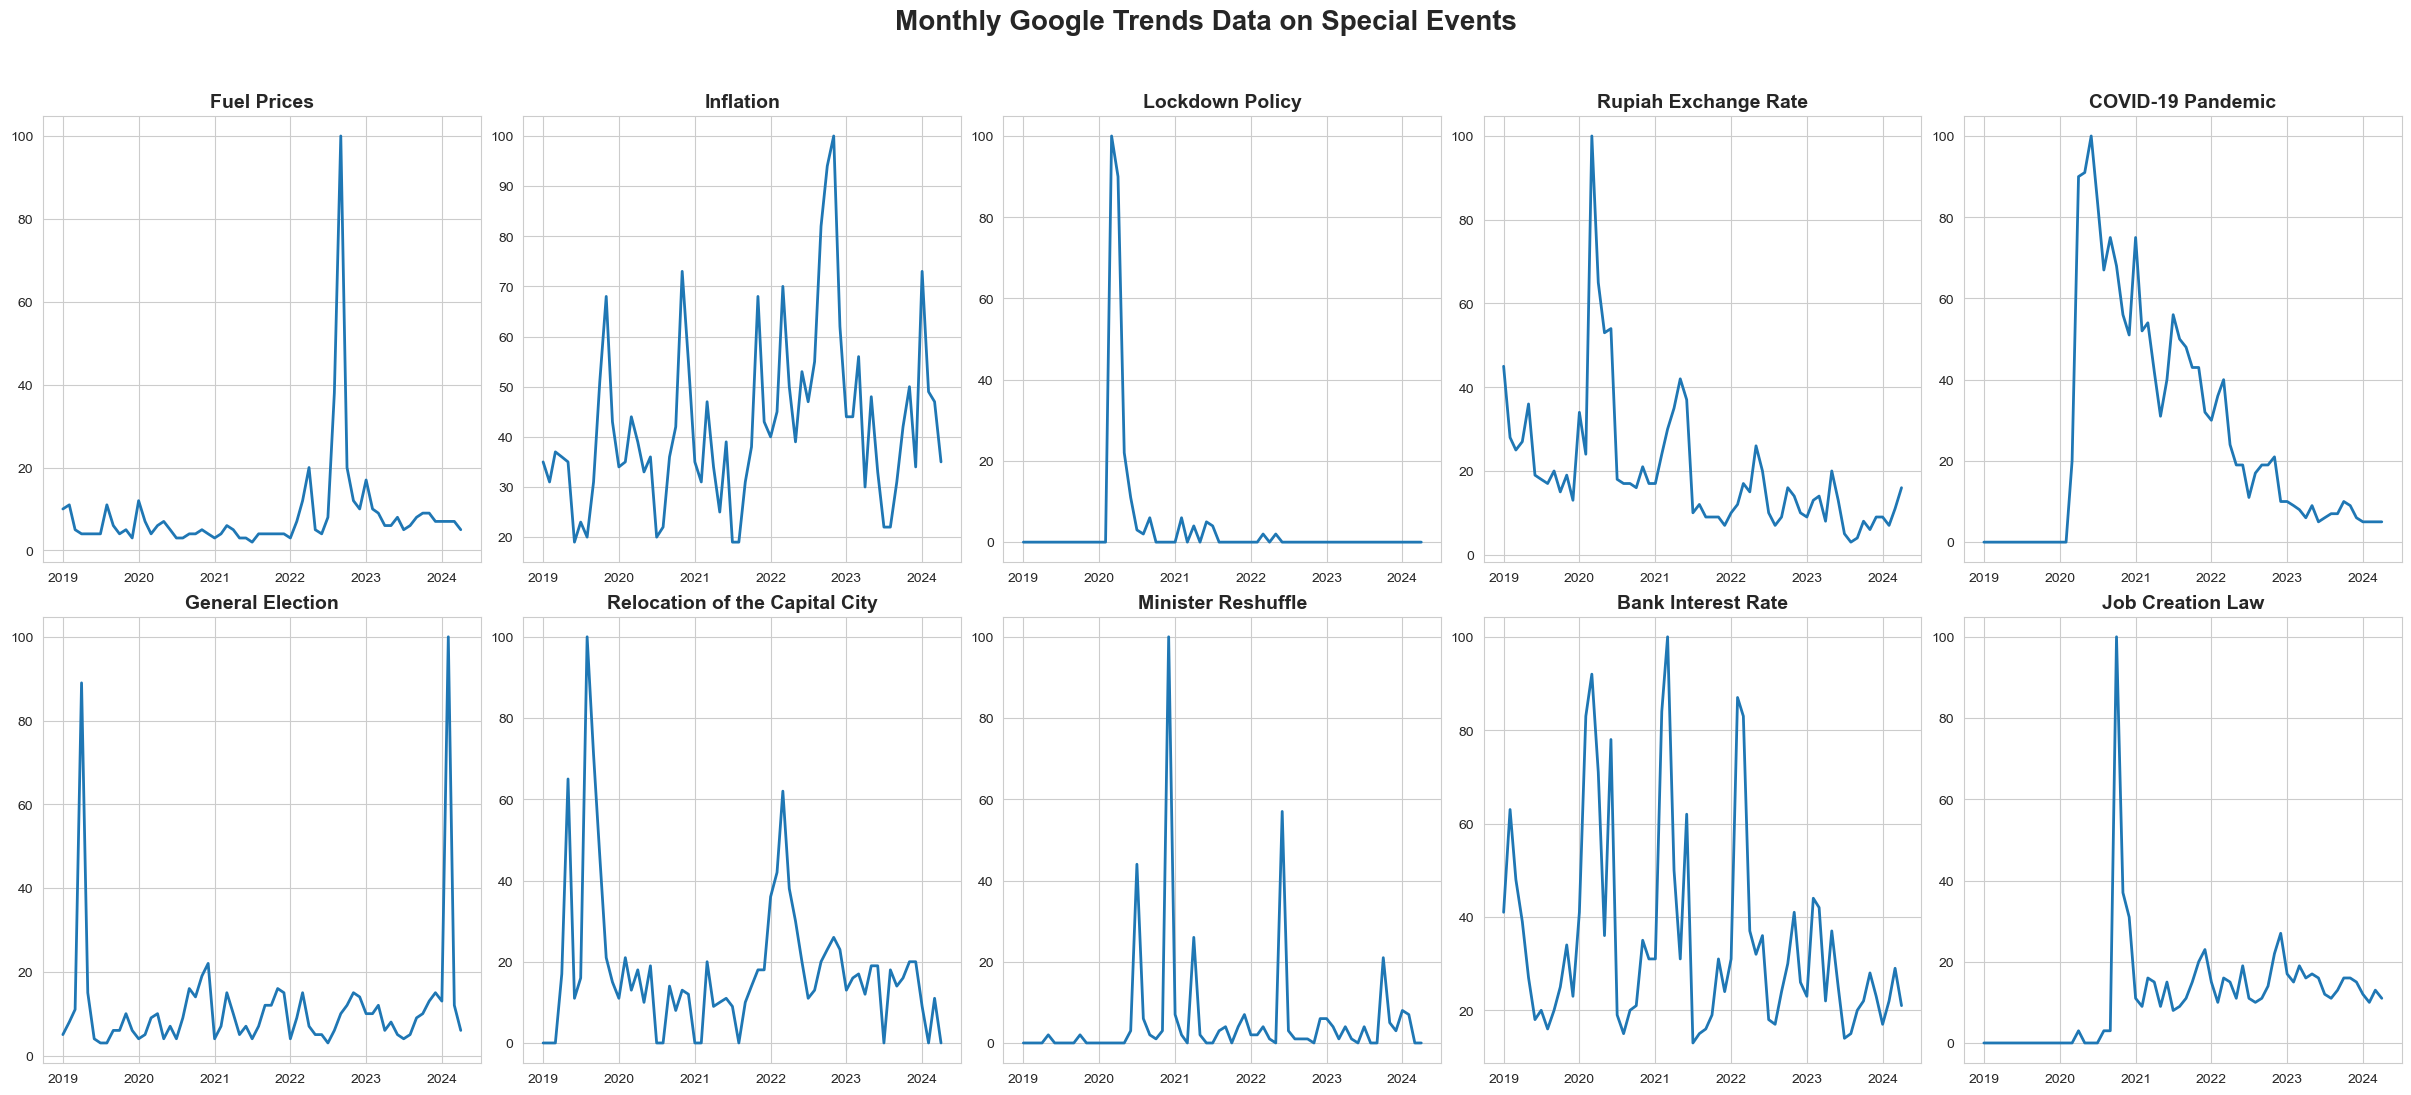

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tema seaborn yang bersih
sns.set_style("whitegrid")

# Data
df = monthly_df

# Label untuk tiap subplot
nama_kolom = [
    "Fuel Prices",
    "Inflation",
    "Lockdown Policy",
    "Rupiah Exchange Rate",
    "COVID-19 Pandemic",
    "General Election",
    "Relocation of the Capital City",
    "Minister Reshuffle",
    "Bank Interest Rate", 
    "Job Creation Law"
]

kolom = df.columns[1:]
n_kolom = len(kolom)

cols = 5
rows = 2

# Ukuran figure diperbesar agar lebih jelas
fig, axes = plt.subplots(rows, cols, figsize=(24, 10), constrained_layout=True)
axes = axes.flatten()

# Warna garis yang profesional (tetap satu warna)
warna_garis = '#1f77b4'

# Plotting
for i, kol in enumerate(kolom):
    ax = axes[i]
    ax.plot(df["date"], df[kol], color=warna_garis, linewidth=2)
    ax.set_title(nama_kolom[i], fontsize=14, fontweight='bold')

    ax.set_xlabel('')
    ax.set_ylabel('')

# Hapus subplot kosong kalau ada
for j in range(n_kolom, len(axes)):
    fig.delaxes(axes[j])

# Judul besar di atas
plt.suptitle("Monthly Google Trends Data on Special Events", fontsize=20, fontweight='bold', y=1.08 )
plt.savefig("Monthly Google Trends Data.png", dpi=300, bbox_inches='tight')

plt.show()


## Imputate Data

In [28]:
LQ45[LQ45.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
24,2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN
46,2019-03-07,NaN,NaN,NaN,NaN,NaN,NaN
65,2019-04-03,NaN,NaN,NaN,NaN,NaN,NaN
75,2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN
77,2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN
85,2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN
106,2019-05-30,NaN,NaN,NaN,NaN,NaN,NaN
108,2019-06-03,NaN,NaN,NaN,NaN,NaN,NaN
109,2019-06-04,NaN,NaN,NaN,NaN,NaN,NaN
110,2019-06-05,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
LQ45 = LQ45.dropna().reset_index(drop=True)

In [30]:
LQ45

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,983.580017,986.570007,980.210022,984.349976,984.349976,1.136800e+09
1,2019-01-03,983.090027,990.880005,981.159973,990.880005,990.880005,1.294000e+09
2,2019-01-04,988.400024,1001.640015,985.940002,1001.640015,1001.640015,1.978200e+09
3,2019-01-07,1012.400024,1017.830017,1002.780029,1002.780029,1002.780029,2.613300e+09
4,2019-01-08,1004.039978,1008.440002,994.010010,997.419983,997.419983,1.774800e+09
...,...,...,...,...,...,...,...
1288,2024-04-24,931.159973,936.679993,924.880005,931.359985,931.359985,5.021600e+09
1289,2024-04-25,929.789978,931.809998,920.619995,923.489990,923.489990,3.721400e+09
1290,2024-04-26,919.450012,921.890015,898.780029,898.780029,898.780029,4.495700e+09
1291,2024-04-29,895.229980,917.380005,894.650024,915.349976,915.349976,4.753100e+09


## Adjust data tren yang digunakan berdasarkan saham

In [31]:
from datetime import datetime, timedelta

In [32]:
tanggal_saham = LQ45['Date'].tolist()

In [33]:
data_luar_date_saham = adjust_daily_data[~adjust_daily_data['date'].isin(tanggal_saham)].reset_index(drop=True)
data_dalam_date_saham  = adjust_daily_data[adjust_daily_data['date'].isin(tanggal_saham)].reset_index(drop=True)

n = 1
check = data_dalam_date_saham.copy() 
for i in range(len(data_luar_date_saham["date"])):
    try:
        tanggal_saat_ini = data_luar_date_saham["date"][i]
        tanggal_besok = tanggal_saat_ini + timedelta(days=1)
        if data_luar_date_saham["date"][i+1]==tanggal_besok:
            n += 1
            continue
        else:
            indeks = check.index[check["date"]==tanggal_besok][0]
            data_baru = check.iloc[indeks,1:]
            for j in range(n):
                data_baru =  data_baru + data_luar_date_saham.iloc[i-j,1:]
            check.iloc[indeks,1:] = data_baru
            n = 1
    except:
        indeks = check.index[check["date"]==tanggal_besok][0]
        data_baru = check.iloc[indeks,1:]
        for j in range(n):
            data_baru =  data_baru + data_luar_date_saham.iloc[i-j,1:]
        check.iloc[indeks,1:] = data_baru
        n = 1
adjust_daily_data_saham = check

In [34]:
adjust_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1947 entries, 0 to 1946
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               1947 non-null   datetime64[ns]
 1   harga_bbm                          1947 non-null   object        
 2   inflasi                            1947 non-null   object        
 3   kebijakan_lockdown                 1947 non-null   object        
 4   nilai_tukar_rupiah_terhadap_dolar  1947 non-null   object        
 5   pandemi_covid_19                   1947 non-null   object        
 6   pemilihan_umum                     1947 non-null   object        
 7   pemindahan_ibu_kota_negara         1947 non-null   object        
 8   reshuffle_menteri                  1947 non-null   object        
 9   suku_bunga_bank                    1947 non-null   object        
 10  undang-undang_cipta_kerja          1947 n

In [35]:
adjust_daily_data_saham.to_csv("adjust.csv")

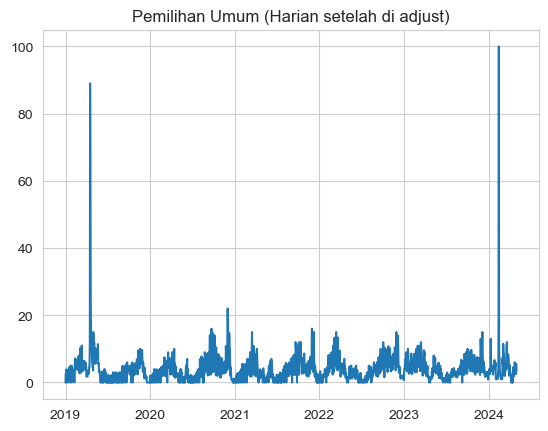

In [36]:
sns.set_style('whitegrid')

plt.plot(adjust_daily_data["date"],adjust_daily_data["pemilihan_umum"])
plt.title("Pemilihan Umum (Harian setelah di adjust)")
plt.show()

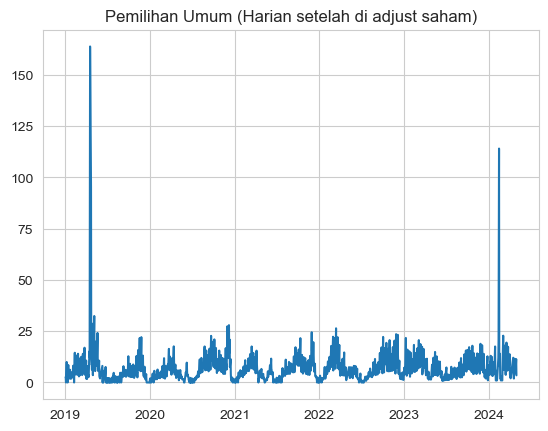

In [37]:
sns.set_style('whitegrid')

plt.plot(adjust_daily_data_saham["date"],adjust_daily_data_saham["pemilihan_umum"])
plt.title("Pemilihan Umum (Harian setelah di adjust saham)")
plt.show()

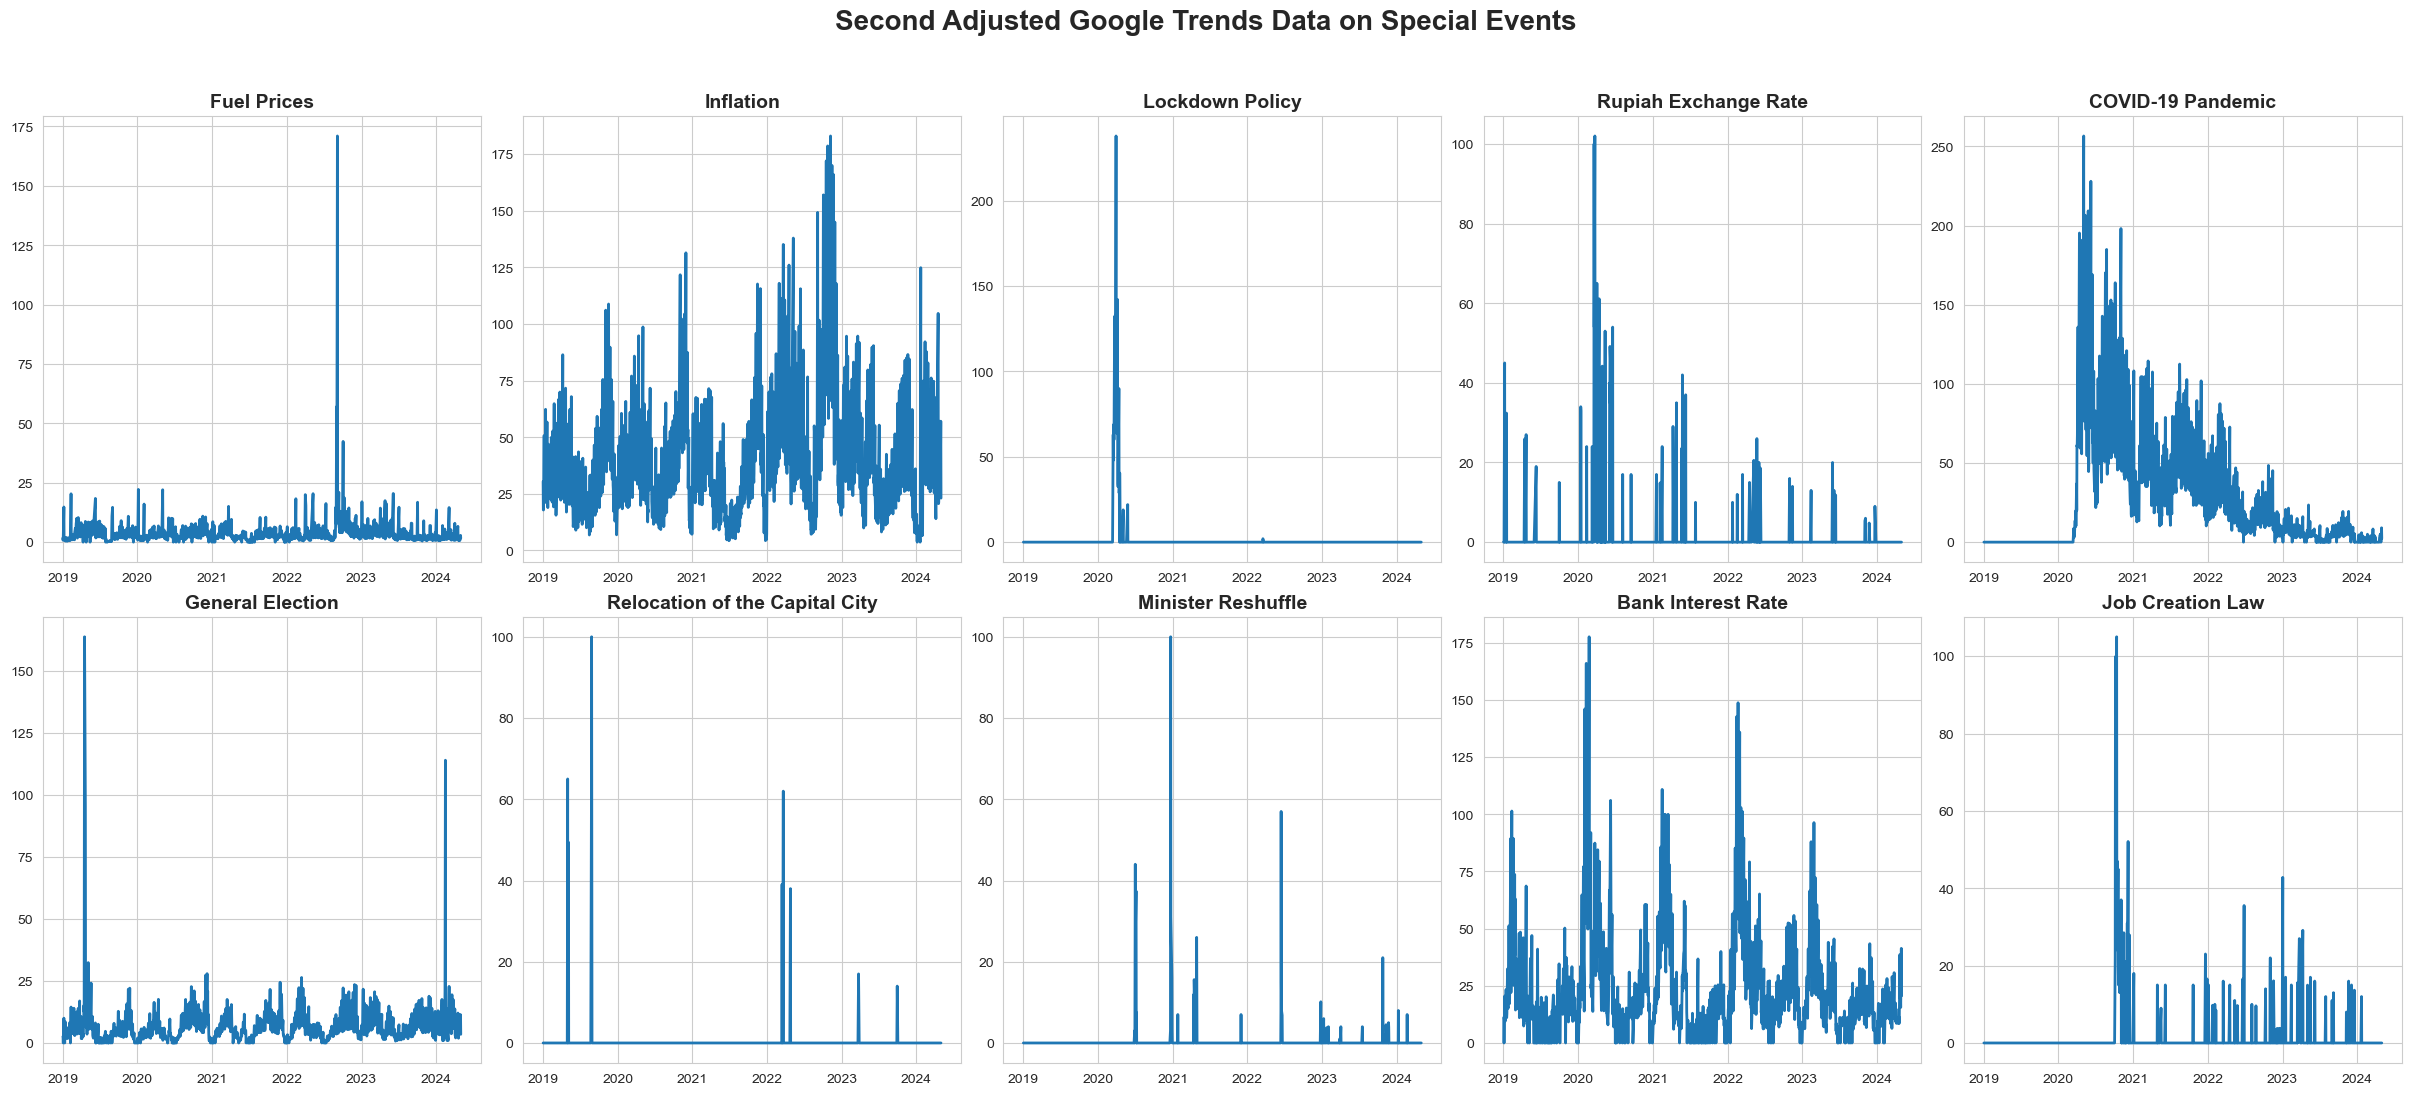

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tema seaborn yang bersih
sns.set_style("whitegrid")

# Data
df = adjust_daily_data_saham

# Label untuk tiap subplot
nama_kolom = [
    "Fuel Prices",
    "Inflation",
    "Lockdown Policy",
    "Rupiah Exchange Rate",
    "COVID-19 Pandemic",
    "General Election",
    "Relocation of the Capital City",
    "Minister Reshuffle",
    "Bank Interest Rate", 
    "Job Creation Law"
]

kolom = df.columns[1:]
n_kolom = len(kolom)

cols = 5
rows = 2

# Ukuran figure diperbesar agar lebih jelas
fig, axes = plt.subplots(rows, cols, figsize=(24, 10), constrained_layout=True)
axes = axes.flatten()

# Warna garis yang profesional (tetap satu warna)
warna_garis = '#1f77b4'

# Plotting
for i, kol in enumerate(kolom):
    ax = axes[i]
    ax.plot(df["date"], df[kol], color=warna_garis, linewidth=2)
    ax.set_title(nama_kolom[i], fontsize=14, fontweight='bold')

    ax.set_xlabel('')
    ax.set_ylabel('')

# Hapus subplot kosong kalau ada
for j in range(n_kolom, len(axes)):
    fig.delaxes(axes[j])

# Judul besar di atas
plt.suptitle("Second Adjusted Google Trends Data on Special Events", fontsize=20, fontweight='bold', y=1.08 )
plt.savefig("Second Adjusted Google Trends Data.png", dpi=300, bbox_inches='tight')

plt.show()


# Statistika Deskriptif

## Saham Indeks

In [40]:
LQ45['hari'] = LQ45['Date'].dt.day_name()
LQ45 = LQ45[["hari","Date","Close"]]

In [41]:
grouped_return = LQ45.groupby('hari')
print(grouped_return["Close"].describe())

           count        mean        std         min         25%         50%  \
hari                                                                          
Friday     254.0  937.975433  81.444284  624.760010  910.089996  954.309998   
Monday     263.0  934.480874  83.966309  583.409973  908.750000  953.219971   
Thursday   255.0  936.891687  84.902863  612.119995  909.049988  953.559998   
Tuesday    265.0  933.960341  85.736822  566.830017  907.880005  952.630005   
Wednesday  256.0  934.733007  83.853234  655.630005  912.430023  953.360016   

                  75%          max  
hari                                
Friday     994.977478  1056.859985  
Monday     994.384979  1063.849976  
Thursday   995.365021  1085.439941  
Tuesday    992.859985  1075.109985  
Wednesday  993.550003  1074.250000  


In [72]:
adjust_daily_data_saham

,date,harga_bbm,inflasi,kebijakan_lockdown,nilai_tukar_rupiah_terhadap_dolar,pandemi_covid_19,pemilihan_umum,pemindahan_ibu_kota_negara,reshuffle_menteri,suku_bunga_bank,undang-undang_cipta_kerja
0,2019-01-02,1.7,30.45,0.0,0.0,0.0,2.55,0.0,0.0,11.07,0.0
1,2019-01-03,0.8,17.85,0.0,0.0,0.0,2.3,0.0,0.0,9.84,0.0
2,2019-01-04,2.4,17.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,14.8,50.75,0.0,45.0,0.0,10.0,0.0,0.0,20.5,0.0
4,2019-01-08,1.2,28.0,0.0,0.0,0.0,1.95,0.0,0.0,17.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1288,2024-04-24,1.2,35.0,0.0,0.0,5.0,5.58,0.0,0.0,21.0,0.0
1289,2024-04-25,0.8,30.8,0.0,0.0,2.2,4.5,0.0,0.0,20.16,0.0
1290,2024-04-26,0.75,23.8,0.0,0.0,0.0,4.56,0.0,0.0,15.54,0.0
1291,2024-04-29,2.85,57.05,0.0,0.0,9.05,11.4,0.0,0.0,41.37,0.0


In [73]:
adjust_daily_data_saham[adjust_daily_data_saham.columns[1:]] = adjust_daily_data_saham[adjust_daily_data_saham.columns[1:]].apply(pd.to_numeric, errors='coerce')

In [74]:
adjust_daily_data_saham['hari'] = adjust_daily_data_saham['date'].dt.day_name()

In [75]:
test = adjust_daily_data_saham.iloc[:,1:].groupby('hari').describe()

In [87]:
test["undang-undang_cipta_kerja"]

,count,mean,std,min,25%,50%,75%,max
hari,,,,,,,,
Friday,254.0,0.967441,6.286262,0.0,0.0,0.0,0.0,85.0
Monday,263.0,2.820342,9.888136,0.0,0.0,0.0,0.0,105.0
Thursday,255.0,1.471255,7.899836,0.0,0.0,0.0,0.0,100.0
Tuesday,265.0,1.311623,7.104501,0.0,0.0,0.0,0.0,89.0
Wednesday,256.0,1.153555,6.951981,0.0,0.0,0.0,0.0,91.0


In [49]:
adjust_daily_data.columns

Index(['date', 'harga_bbm', 'inflasi', 'kebijakan_lockdown',
       'nilai_tukar_rupiah_terhadap_dolar', 'pandemi_covid_19',
       'pemilihan_umum', 'pemindahan_ibu_kota_negara', 'reshuffle_menteri',
       'suku_bunga_bank', 'undang-undang_cipta_kerja', 'hari'],
      dtype='object')